In [4]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [5]:
# Load the audio file
def audio_graph_plot(file_path):
    y, sr = librosa.load(file_path,sr=None) 
    # Takes the file path and Sampling Rate(sr), default sr=22050 and returns y(np.array of amplitude) , sr) 
#     print("Samples:",y)
#     print("Total Samples:",len(y))
#     print("Sampling rate:",sr)
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr) # displays waveform in time domain
    plt.title('Augmented Audio with Gaussian Noise')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    '''
    librosa.stft(y): Computes the Short-Time Fourier Transform of the audio signal,
    resulting in a complex-valued matrix representing the frequency content over time.

    np.abs(librosa.stft(y)): Converts the complex STFT matrix to a real-valued magnitude (amplitude) spectrum, 
    representing the strength of each frequency component over time.

    librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max): Converts the amplitude spectrum to a decibel (dB) scale using the maximum value as the reference, 
    normalizing the data and making it more suitable for visualization. 20log10(mag/ref)
    '''
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log') # Spectrogram Representation
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
#     return y


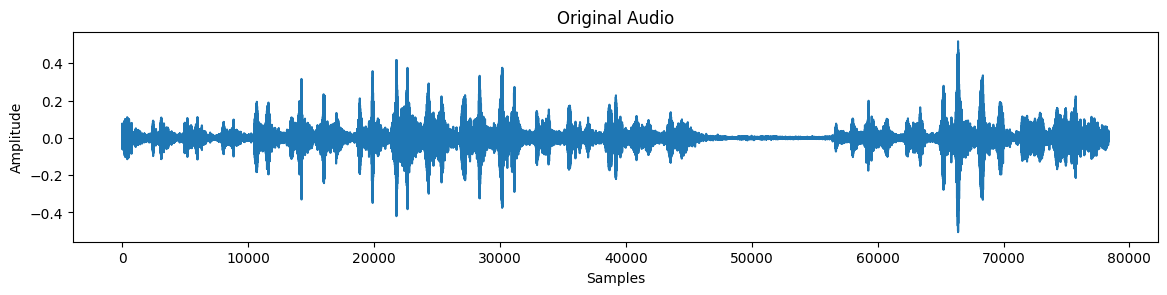

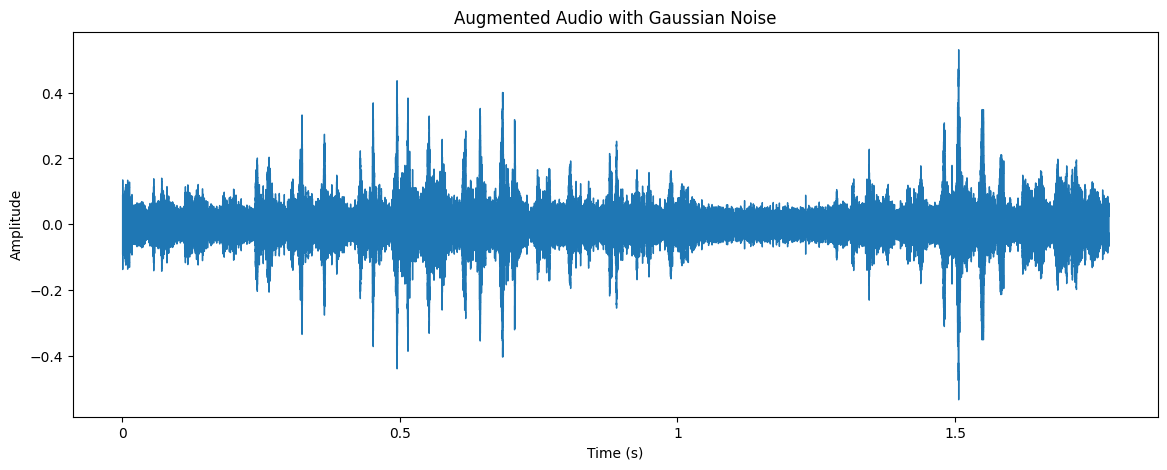

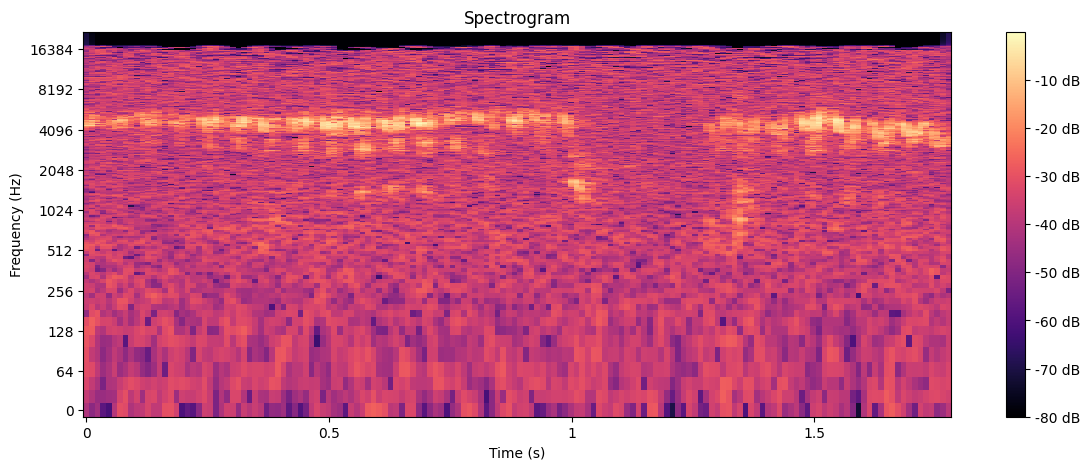

In [6]:

# Audio File
audio_path = 'cleaned_audio_librosa.mp3'
x, sr = librosa.load(audio_path, sr=None)

# Gaussian noise
mu = 0
sigma = 0.02
n = np.random.normal(mu, sigma, x.shape)

# Augmented audio data
x_aug = x + n

# Save the file
sf.write('new.mp3', x_aug, sr)

# Ploting original audio
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(x)
plt.title('Original Audio')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Ploting augmented audio
audio_graph_plot('new.mp3')